# Q4

### c.

In [ ]:
from scipy.stats import expon
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np




def calc_var_expon(lst):
  num_left_sum = 0
  num_right_sum = 0
  for i in range(len(lst)):
    curr = lst[i]
    num_left_sum += (1/(sum(curr)/len(curr)))**2
    num_right_sum += 1/(sum(curr)/len(curr))

  return num_left_sum/len(lst) - ((num_right_sum/len(lst))**2)

def calc_expected(lst):
  suma = 0
  for i in range(len(lst)):
    suma += (1/(sum(lst[i])/len(lst[i])))

  return suma/len(lst)

def calc_var_poi(lst):
  num_left_sum = 0
  num_right_sum = 0
  for i in range(len(lst)):
    curr = lst[i]
    num_left_sum += (sum(curr)/len(curr))**2
    num_right_sum += sum(curr)/len(curr)

  return num_left_sum/len(lst) - ((num_right_sum/len(lst))**2)



Average of investigator A MSE values:0.0006392557331547657
Average of investigator B MSE values:0.005026514710000028


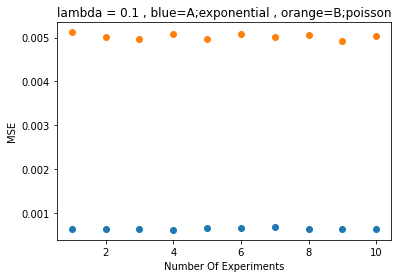

In [ ]:
n=10000
num_of_points=10
#lambda=0.1

MSE_val_A = []
MSE_val_B = []
for i in range(num_of_points):
  lst_exp = [ expon.rvs(scale=10 , size=20) for i in range(n)]
  MSE_val_A.append(calc_var_expon(lst_exp) + (calc_expected(lst_exp) - 0.1)**2)

  lst_poi = [poisson.rvs(mu=0.1, size=20) for i in range(n)] #here we take t=1, which means how many occurs in 1 year
  MSE_val_B.append(calc_var_poi(lst_poi))

x_axis = [ x for x in range(1,num_of_points+1)]
plt.scatter(x_axis, MSE_val_A)
plt.scatter(x_axis, MSE_val_B,)
plt.ylabel("MSE")
plt.xlabel("Number Of Experiments")
plt.title("lambda = 0.1 , blue=A;exponential , orange=B;poisson")

print("Average of investigator A MSE values: " + str(sum(MSE_val_A)/num_of_points))
print("Average of investigator B MSE values: " + str(sum(MSE_val_B)/num_of_points))

#print("MSE of A: " + str(MSE_val_A) + "\n" + "MSE of B: " + str(MSE_val_B))
#print("blue is MSE of A-exponential \norange is MSE of B-poisson")
#presenting simulation of num_of_points different MSE to each of the estimators

Average of investigator A MSE values:6.424536960168979
Average of investigator B MSE values:0.5001678187448448


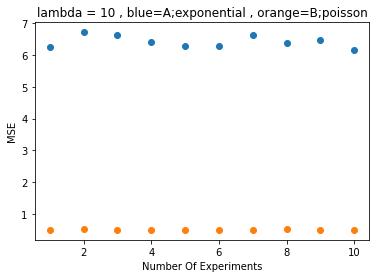

In [ ]:
n=10000
num_of_points=10
#lambda=10

MSE_val_A = []
MSE_val_B = []
for i in range(num_of_points):
  lst_exp = [expon.rvs(scale=0.1 , size=20) for i in range(n)]
  MSE_val_A.append(calc_var_expon(lst_exp) + (calc_expected(lst_exp) - 10)**2)

  lst_poi = [poisson.rvs(mu=10, size=20) for i in range(n)] #here we take t=1, which means how many occurs in 1 year
  MSE_val_B.append(calc_var_poi(lst_poi))


x_axis = [ x for x in range(1,num_of_points+1)]
plt.scatter(x_axis, MSE_val_A)
plt.scatter(x_axis, MSE_val_B,)
plt.ylabel("MSE")
plt.xlabel("Number Of Experiments")
plt.title("lambda = 10 , blue=A;exponential , orange=B;poisson")

print("Average of investigator A MSE values: " + str(sum(MSE_val_A)/num_of_points))
print("Average of investigator B MSE values: " + str(sum(MSE_val_B)/num_of_points))

#print("MSE of A: " + str(MSE_val_A) + "\n" + "MSE of B: " + str(MSE_val_B))
#print("blue is MSE of A-exponential \norange is MSE of B-poisson")
#presenting simulation of num_of_points different MSE to each of the estimators

* For lambda=0.1 exponential measurment preferable as poisson takes it harder to evalute small amount of earthquakes per year. Things change when the lambda=10. The variance of both approaches to 0, so it increases the overall MSE insignificantly. But the bias of exponential estimator effects the overall MSE value and increases it while the poisson has no bias and therfore does not influence.